In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import networkx as nx
import pandas as pd

### Kuramoto Discrete Model

$\theta_i^h(n+1) = \theta_i^h(n) + h \Omega_i + \frac{hK}{N}\sum_{j=1}^N \sin(\theta_j^h(n) -\theta_i^h(n))$, $n=0,1,2,..$, $1 \leq i \leq N$

$\theta$ fase do oscilador, $\Omega$ frequencia natural, $h := \Delta t$ , $K$ constante de acoplamento, $N$ número de osciladores acoplados, $n$ passo


$\theta_i^h(n+1) = \theta_i^0$, $\sum_{i=1}^N \theta_i^0 = 0$ 

In [2]:
class Agent:
    def __init__(self, i, posx, posy, v, D, raio, theta,omega):
        #Possição e velocidade
        self.posx = posx 
        self.posy = posy 
        self.v = v
        self.D = D
        #Id do agente
        self.indice= i
        self.nome="Pessoa "+str(i)
        #Condições
        self.raio = raio
        self.theta = theta
        self.omega = omega
    def __str__(self):
        return self.nome+" na posicao ("+str(self.posx)+", "+str(self.posy) +")"
    def position(self): 
        if self.posx >= self.D or self.posy >= self.D:
            self.posx = np.random.uniform(-np.pi,-0.001)*self.v
            self.posy = self.posy + np.random.uniform(-1,1)*self.v
        if self.posx <= -self.D or self.posy <= -self.D:
            self.posx = self.posx + np.random.uniform(0,1)*self.v
            self.posy = np.random.uniform(0.001,np.pi)*self.v
        else: 
            self.posx = self.posx + np.random.uniform(-1,1)*self.v #Caso seja um movimento para qualquer lado
            self.posy = self.posy + np.random.uniform(-1,1)*self.v #aleatorio colocar np.random.uniform(-1,1)
    def get_pos(self):
        return (self.posx,self.posy)
    def get_dist(self,x,y):
        return np.sqrt((self.posx-x)**2+(self.posy-y)**2)    

In [ ]:
#Definir quais agentes estao proximos e com isso calcula-se a frequencia nova de oscilacao
def Kuramoto():
    if get_dist(x,y) <= self.raio:
        su = 0
        for i in range(0,N):
            su+= np.sin(theta-self.theta)
        self.theta = h*omega +( (h*k/N) *su)

In [245]:
def simulation(frame,tempo, k):
    thetas = {}
    thetas_anteriores = k[frame-1]
    #print(thetas_anteriores)
    dt = 0.1
    k = 0.9
    N = n
    #omega = np.pi
    for p in pessoas:
        #p.check_contagio(frame) 
        p.position() 
        for per in pessoas:
            per.get_pos()
            d = p.get_dist(per.posx,per.posy)
            thetas_proximos = []
            if d < p.raio:
                ##per.theta = thetas_anteriores.get(per.indice) + h*per.omega +( (h*k/N) *(np.sin(p.theta - per.theta) ))
                #p.theta = thetas_anteriores.get(p.indice) + h*p.omega +( (h*k/N) *(np.sin(per.theta - p.theta) ))
                thetas_proximos.append(per.theta)
                #thetas_anteriores = 0
            thetas[p.indice] = p.theta
        if thetas_proximos == []:
            pass
        else:
            cu = []
            for i in range(0,len(thetas_proximos)):
                cu.append(thetas_proximos[i]-p.theta)
            p.theta = thetas_anteriores.get(p.indice) + (dt*p.omega) +((dt*k/N)*(sum(np.sin(cu))))
    #posicaox.append(p.posx)
    #posicaoy.append(p.posy)
    tempo.append(frame)
    return thetas

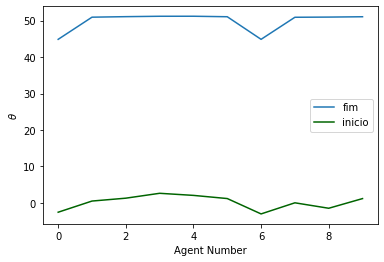

In [246]:
import random as rd
n = 10 #Número de pessoas
r_contagio = 1 #raio de contagio
D = 1 #Dimension
v = 0.0001 #velocidade
inter = 1000 #tempo
#omega_agent = np.pi

pessoas = []

posicao_inicial_x = n*[rd.uniform(-D,D)]#Distribuir os pontos uniformente sobre a superficie
posicao_inicial_y = n*[rd.uniform(-D,D)]

thetas = {}
for i in range(n):
    theta_agent = rd.uniform(-np.pi,np.pi)
    omega_agent = 1 #rd.uniform(0,1)
    p = Agent(i,posicao_inicial_x[i],posicao_inicial_y[i],v, D,r_contagio,theta_agent,omega_agent)
    pessoas.append(p)
    thetas[p.indice] = p.theta


posicaox = []
posicaoy = []
posicaoz = []
tempo = [0]

k= [thetas]
k1 = []
#print(k)
for i in range(1,inter):
    k.append(simulation(i,tempo,k))
#    print(k)
    #print("Porcentagem de conclusão: " ,'%.2f'%((i/inter)*100),'%') 
    #k1 = k
#print(k[inter-1])

myDictionary = k[inter-1]
# no = []
# for values in myDictionary:
#     no.append(np.sin(values))
# print(no)
plt.plot(myDictionary.keys(), myDictionary.values(), label = "fim")

# cu = np.sin(k[0])
plt.plot(thetas.keys(), thetas.values(), color = 'darkgreen', label  = 'inicio')
plt.legend(loc = "best")
plt.xlabel("Agent Number")
plt.ylabel(r'$\theta$')
plt.show()

<AxesSubplot:xlabel='Time', ylabel='$\\theta$'>

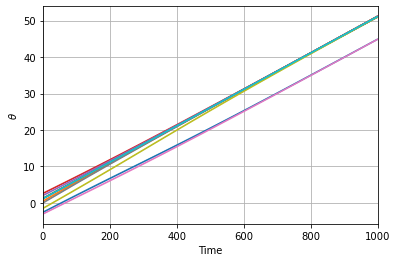

In [247]:
df = pd.DataFrame(k)
df.plot(legend= False, grid = True, xlabel = "Time", ylabel = r"$\theta$", xlim = (0,inter))

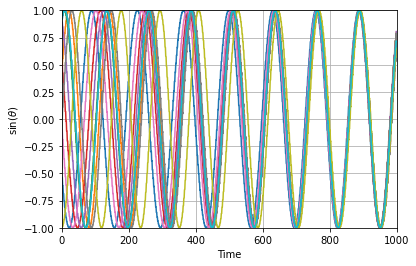

In [248]:
#%timeit df.transform(lambda x: np.sin(x))
cu = df.transform(lambda x: np.sin(x))
cu.plot(legend = False, xlabel = "Time", ylabel = r"$\sin(\theta)$",
        grid = True, xlim = (0,inter), ylim = (-1,1))
#plt.savefig("teste.png")
plt.show()

In [144]:
#import numba
#@numba.vectorize
#def sine_convert(x):
#    return np.sin(x)
#%timeit df.apply(lambda x: sine_convert(df))

$r(t)e^{i \psi(t)} = \frac{1}{N}\sum_{j=1}^N e^{i \theta_j(t)}$, com $0 \leq r(t) \leq 1$